In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a28038144ceb2a70c5a59cc8c4816c3


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping..." + city.title())
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | sulangan
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | chulumani
Processing Record 8 of Set 1 | dingle
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | svetlaya
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | inhambane
Processing Record 13 of Set 1 | paradwip
City not found. Skipping...Paradwip
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | san quintin
Processing Record 16 of Set 1 | yar-sale
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | tayga
Processing Record 19 of Set 1 | codrington
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | upernavik
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | petropavlovsk-kamchatskiy
Proce

Processing Record 27 of Set 4 | thinadhoo
Processing Record 28 of Set 4 | rocky mountain house
Processing Record 29 of Set 4 | ribeira grande
Processing Record 30 of Set 4 | nome
Processing Record 31 of Set 4 | andenes
Processing Record 32 of Set 4 | hovd
Processing Record 33 of Set 4 | sukabumi
Processing Record 34 of Set 4 | yuzhne
Processing Record 35 of Set 4 | tiksi
Processing Record 36 of Set 4 | bandarbeyla
Processing Record 37 of Set 4 | itoigawa
Processing Record 38 of Set 4 | puerto del rosario
Processing Record 39 of Set 4 | hithadhoo
Processing Record 40 of Set 4 | haines junction
Processing Record 41 of Set 4 | lingyuan
Processing Record 42 of Set 4 | skjervoy
Processing Record 43 of Set 4 | goderich
Processing Record 44 of Set 4 | knysna
Processing Record 45 of Set 4 | bathsheba
Processing Record 46 of Set 4 | winnemucca
Processing Record 47 of Set 4 | narsaq
Processing Record 48 of Set 4 | senneterre
Processing Record 49 of Set 4 | clyde river
Processing Record 50 of Set

Processing Record 18 of Set 8 | gizo
Processing Record 19 of Set 8 | mecca
Processing Record 20 of Set 8 | bahia blanca
Processing Record 21 of Set 8 | paamiut
Processing Record 22 of Set 8 | yumen
Processing Record 23 of Set 8 | colon
Processing Record 24 of Set 8 | ngunguru
Processing Record 25 of Set 8 | mosquera
Processing Record 26 of Set 8 | tevriz
Processing Record 27 of Set 8 | bonthe
Processing Record 28 of Set 8 | cabedelo
Processing Record 29 of Set 8 | cockburn town
Processing Record 30 of Set 8 | suntar
Processing Record 31 of Set 8 | tezu
Processing Record 32 of Set 8 | chernyshevskiy
Processing Record 33 of Set 8 | quanzhou
Processing Record 34 of Set 8 | saleaula
City not found. Skipping...Saleaula
Processing Record 35 of Set 8 | araouane
Processing Record 36 of Set 8 | bikaner
Processing Record 37 of Set 8 | coolum beach
Processing Record 38 of Set 8 | scarborough
Processing Record 39 of Set 8 | broken hill
Processing Record 40 of Set 8 | beloha
Processing Record 41 of

Processing Record 7 of Set 12 | dengfeng
Processing Record 8 of Set 12 | ewa beach
Processing Record 9 of Set 12 | brigantine
Processing Record 10 of Set 12 | puerto escondido
Processing Record 11 of Set 12 | warrnambool
Processing Record 12 of Set 12 | pemangkat
Processing Record 13 of Set 12 | madang
Processing Record 14 of Set 12 | kemptville
Processing Record 15 of Set 12 | ola
Processing Record 16 of Set 12 | gannan
Processing Record 17 of Set 12 | karaul
City not found. Skipping...Karaul
Processing Record 18 of Set 12 | victoria point
Processing Record 19 of Set 12 | magadi
Processing Record 20 of Set 12 | tigil
Processing Record 21 of Set 12 | ivdel
Processing Record 22 of Set 12 | trairi
Processing Record 23 of Set 12 | dickinson
Processing Record 24 of Set 12 | fulton
Processing Record 25 of Set 12 | karkaralinsk
City not found. Skipping...Karkaralinsk
Processing Record 26 of Set 12 | toktogul
Processing Record 27 of Set 12 | peniche
Processing Record 28 of Set 12 | batsfjord


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,73.56,78,40,12.66,TO,2021-08-13 02:36:05
1,Sulangan,11.1373,123.7228,83.50,71,12,1.28,PH,2021-08-13 02:40:16
2,Chuy,-33.6971,-53.4616,43.48,87,0,4.94,UY,2021-08-13 02:36:28
3,Rikitea,-23.1203,-134.9692,74.44,84,4,14.25,PF,2021-08-13 02:35:55
4,Barrow,71.2906,-156.7887,37.42,75,90,10.36,US,2021-08-13 02:35:44
5,Arraial Do Cabo,-22.9661,-42.0278,68.85,84,100,17.74,BR,2021-08-13 02:36:40
6,Chulumani,-16.4096,-67.5263,57.67,88,53,1.66,BO,2021-08-13 02:40:17
7,Dingle,10.9995,122.6711,88.27,62,43,6.58,PH,2021-08-13 02:37:34
8,Yellowknife,62.4560,-114.3525,66.72,55,40,4.61,CA,2021-08-13 02:34:18
9,Svetlaya,46.5389,138.3297,66.33,63,0,7.83,RU,2021-08-13 02:40:18


In [12]:
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.sort_values(by=['Wind Speed'])

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
504,Cayenne,GF,2021-08-13 02:42:44,4.9333,-52.3333,78.10,86,0,0.00
332,Fairfield,US,2021-08-13 02:41:49,41.2668,-73.3162,81.97,79,1,0.00
515,Puerto Escondido,MX,2021-08-13 02:37:12,15.8500,-97.0667,83.23,65,75,0.00
340,Mosquera,CO,2021-08-13 02:41:52,4.7059,-74.2302,53.69,87,75,0.00
389,Quelimane,MZ,2021-08-13 02:42:08,-17.8786,36.8883,67.95,88,0,0.00
...,...,...,...,...,...,...,...,...,...
204,Kahului,US,2021-08-13 02:36:59,20.8947,-156.4700,85.26,68,1,21.85
466,Sola,VU,2021-08-13 02:42:31,-13.8833,167.5500,77.88,78,31,22.84
10,Punta Arenas,CL,2021-08-13 02:35:42,-53.1500,-70.9167,46.09,80,96,23.26
154,Ribeira Grande,PT,2021-08-13 02:37:11,38.5167,-28.7000,73.47,86,47,26.42


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

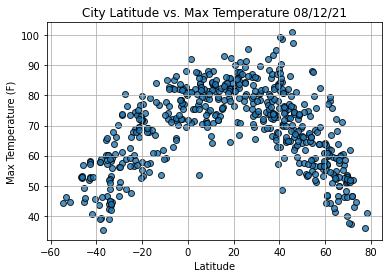

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

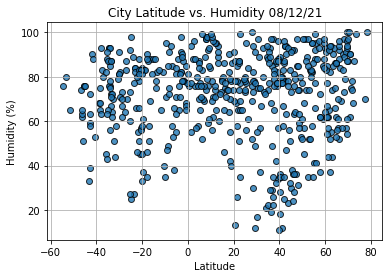

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

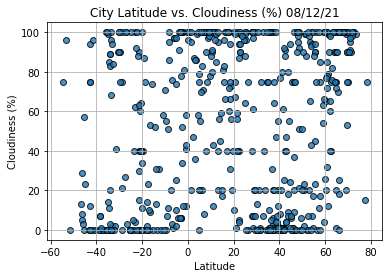

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

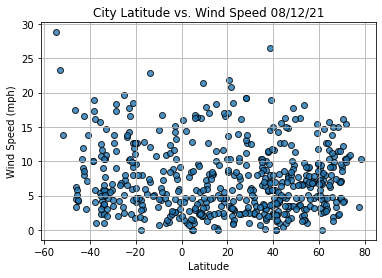

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                  San Quintin
Country                        MX
Date          2021-08-13 02:37:33
Lat                       30.4833
Lng                       -115.95
Max Temp                    73.76
Humidity                       75
Cloudiness                      0
Wind Speed                   6.13
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
536     True
537     True
538     True
539     True
540     True
Name: Lat, Length: 541, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Sulangan,PH,2021-08-13 02:40:16,11.1373,123.7228,83.50,71,12,1.28
4,Barrow,US,2021-08-13 02:35:44,71.2906,-156.7887,37.42,75,90,10.36
7,Dingle,PH,2021-08-13 02:37:34,10.9995,122.6711,88.27,62,43,6.58
8,Yellowknife,CA,2021-08-13 02:34:18,62.4560,-114.3525,66.72,55,40,4.61
9,Svetlaya,RU,2021-08-13 02:40:18,46.5389,138.3297,66.33,63,0,7.83


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

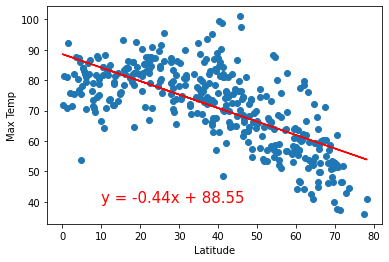

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

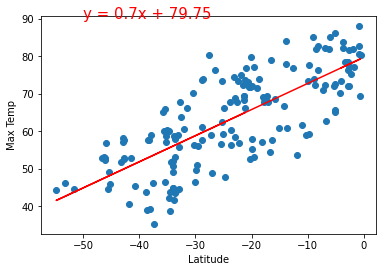

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

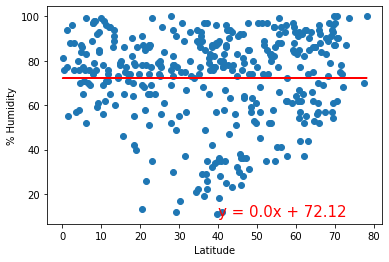

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

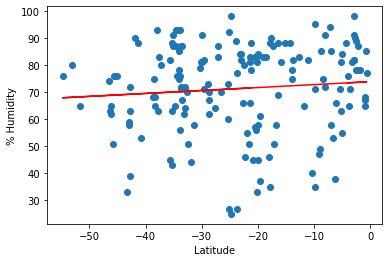

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

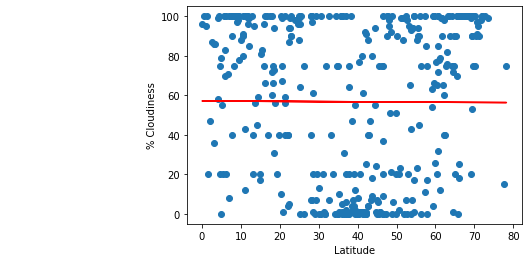

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Cloudiness', '% Cloudiness',(-50,60))

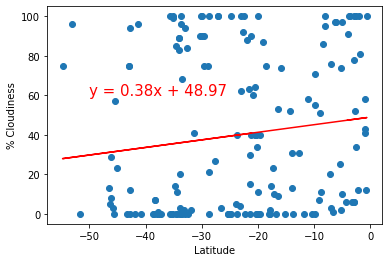

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

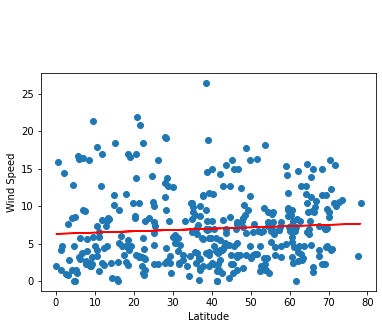

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed',(40,35))


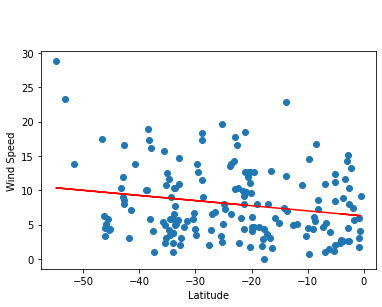

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))